# LINEAR REGRESSION WITH SCIKIT-LEARN

This is an example of multiple linear regression model in Python with the scikit-learn module, performed with Basketball data set. I have used a more sophisticated version of this approach in designing and building "CAPITALONE RECRUITMENT APPLICATION (CORA)". The APP is CapitalOne's official entry to South By SouthWest conference.

# DATASET
I am using the basketball dataset taken from http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html

# DESCRIPTION OF VARIABLES
The dataset contains 5 variables:
X1 = height in feet.

X2 = weight in pounds.

X3 = percent of successful field goals (out of 100 attempted).

X4 = percent of successful free throws (out of 100 attempted).

X5 = average points scored per game.

# PROBLEM STATEMENT
Try to predict average points scored per game by a player given his/her height, weight, percent of successful field goals and percent of successful free throws. I am treating this as a multiple linear regression problem. 

# IMPORT MODULES

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
#from sklearn.cross_validation import train_test_split

# READ CSV DATA
data  = pd.read_csv('C:/Users/happy/Documents/Datasets/Basketball.csv')


# DATA EXPLORATION

In [17]:
print(data.head())
print()

print(data.describe())

#print(data.tail())

print(data.shape)

    X1   X2     X3     X4    X5
0  6.8  225  0.442  0.672   9.2
1  6.3  180  0.435  0.797  11.7
2  6.4  190  0.456  0.761  15.8
3  6.2  180  0.416  0.651   8.6
4  6.9  205  0.449  0.900  23.2

              X1          X2         X3         X4         X5
count  54.000000   54.000000  54.000000  54.000000  54.000000
mean    6.587037  209.907407   0.449111   0.741852  11.790741
std     0.458894   30.265036   0.056551   0.100146   5.899257
min     5.700000  105.000000   0.291000   0.244000   2.800000
25%     6.225000  185.000000   0.415250   0.713000   8.150000
50%     6.650000  212.500000   0.443500   0.753500  10.750000
75%     6.900000  235.000000   0.483500   0.795250  13.600000
max     7.600000  263.000000   0.599000   0.900000  27.400000
(54, 5)


# DATA PRE-PROCESSING

In [18]:
# Check for NaN values
data.isnull().sum().sum()


0

In [20]:
# Remove rows with NaN values
data = data.dropna()
data.isnull().sum().sum()

print(data.describe())

              X1          X2         X3         X4         X5
count  54.000000   54.000000  54.000000  54.000000  54.000000
mean    6.587037  209.907407   0.449111   0.741852  11.790741
std     0.458894   30.265036   0.056551   0.100146   5.899257
min     5.700000  105.000000   0.291000   0.244000   2.800000
25%     6.225000  185.000000   0.415250   0.713000   8.150000
50%     6.650000  212.500000   0.443500   0.753500  10.750000
75%     6.900000  235.000000   0.483500   0.795250  13.600000
max     7.600000  263.000000   0.599000   0.900000  27.400000


In [21]:
# remove all rows that have outliers in at least one column
from scipy import stats
data1 = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

# DATA VISUALIZATION

C:\Users\happy\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


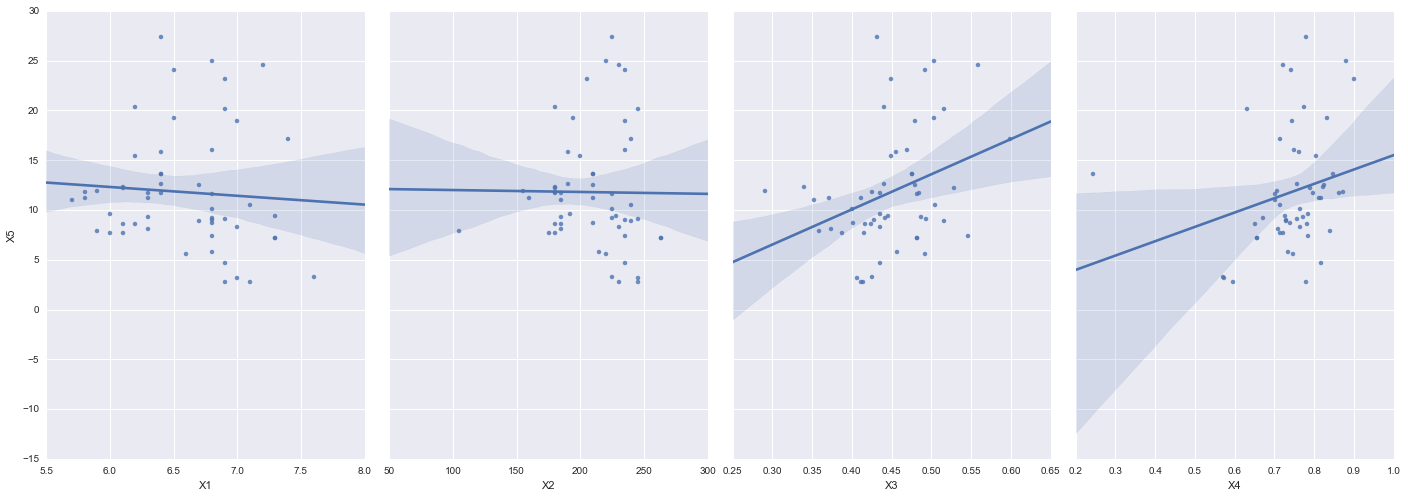

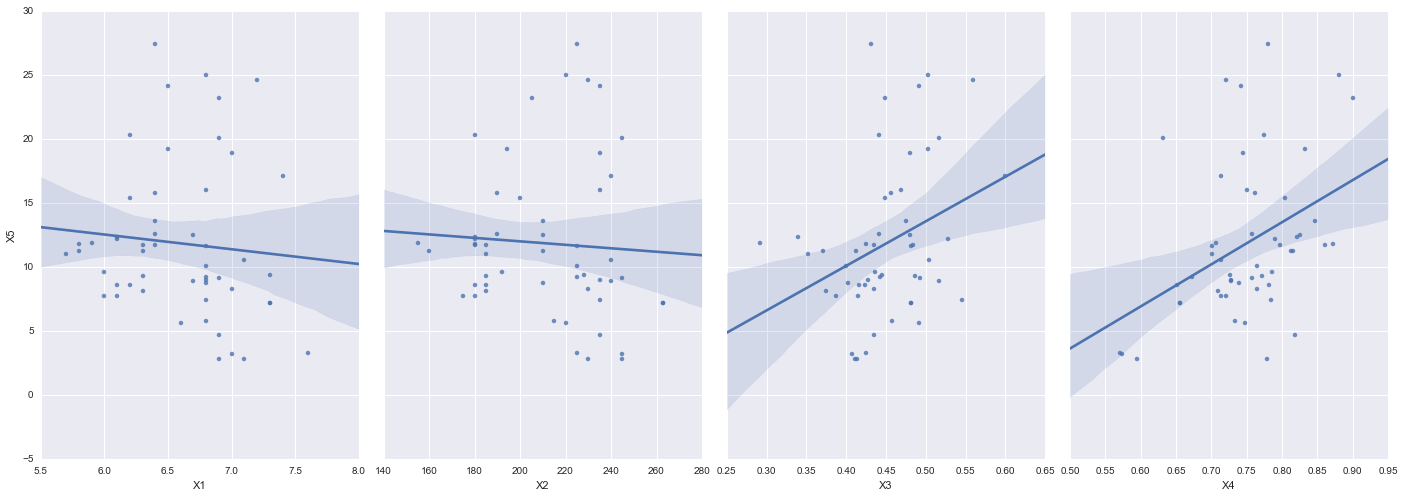

In [23]:
# show plots in the notebook
%matplotlib inline

# Original data
sb.pairplot(data, x_vars= ['X1', 'X2', 'X3', 'X4'], y_vars = 'X5', size =7, aspect = 0.7, kind = 'reg')

# Data without outlier
sb.pairplot(data1, x_vars= ['X1', 'X2', 'X3', 'X4'], y_vars = 'X5', size =7, aspect = 0.7, kind = 'reg')


In [39]:
# THE ABOVE PLOTS SHOW A WIDE SCATTER IN PLAYER HEIGHTS AND WEIGHTS AND ALMOST NO CORRELATION WITH THE AVERAGE POINTS SCORED PER GAME AND A PLAYERS HEIGHT AND WEIGHT. 

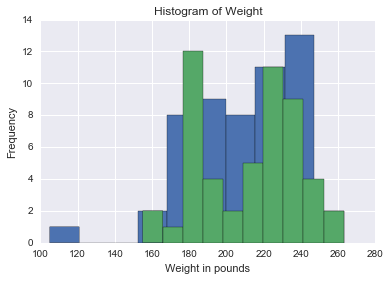

In [27]:
# Compare histograms for weight with and without outlier data points 
data.X2.hist()
plt.title('Histogram of Weight')
plt.xlabel('Weight in pounds')
plt.ylabel('Frequency')
data1.X2.hist()
plt.title('Histogram of Weight')
plt.xlabel('Weight in pounds')
plt.ylabel('Frequency')

# PREPARE DATA FOR LINEAR REGRESSION

In [40]:
# ATTEMPTED MODEL (ALL VARIABLES)
# X5 = Beta0 + Beta1*X1 + Beta2*X2 + Beta3*X3 + Beta4*X4

# Prepare data for modeling 
feature_columns = ['X1', 'X2', 'X3', 'X4']
X = data[feature_columns]

print(X.shape)

# Response Variable
y = data['X5']
print(y.shape)

# Split data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

print(X_train.shape)

(54, 4)
(54,)
(40, 4)


# INSTANTIATE A LINEAR REGRESSION MODEL AND FIT WITH X AND Y

In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# Print the intercept and coefficients
print (linreg.intercept_)
print (linreg.coef_)

8.57826772809
[ -4.48739639e+00  -1.61106170e-03   5.45351082e+01   1.16369781e+01]


In [35]:
# Predict based on test data
y_pred = linreg.predict(X_test)

# MODEL EVALUATION

In [46]:
# Root mean squared error
from sklearn import metrics 
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.71070077132


# MODIFIED MODEL

In [47]:
# NOW LET US REMOVE HEIGHT AND WEIGHT VARIABLES. THE SCATTER PLOTS ABOVE SUGGEST ALMOST ZERO CORRELATION WITH AV POINTS SCORED.

In [48]:
# new MODEL (TWO VARIABLES)
# X5 = Beta0 + Beta1*X3 + Beta2*X4

feature_columns = ['X3', 'X4']
X = data[feature_columns]
y = data['X5']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
linreg = LinearRegression()

linreg.fit(X_train, y_train)
print (linreg.intercept_)
print (linreg.coef_)
y_pred = linreg.predict(X_test)

# Root mean squared error
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X_test, y_test))

-18.0965302427
[ 39.6051788   16.19673283]
3.71070077132
Variance score: 0.13


In [49]:
# WE CAN CLEARY SEE THAT BY USING ONLY TWO VARIABLES (X3 AND X4) WE ARE ABLE TO REDUCE THE RMS VALUE. 
# VARIANCE SUGGEST A LOSE PREDICTION.

# RESULT

In [50]:
# Average points scored per game = -18.1 + 39.6 * percent of successful field goals + 16.2 * percent of successful free throws 

In [51]:
# Average points scored per game is independent on a player's height and weight.